<a href="https://colab.research.google.com/github/vikuyaduvanshi16/AI-Based-Crop-Health-Detection/blob/main/AI_Based_Crop_Health_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Introduction

This project focuses on detecting crop stress using multispectral vegetation indices derived from drone imagery. The objective is to classify crop health into healthy and stressed categories and further generate spatial stress maps that can support precision agriculture decisions.

In [ ]:
# Importing Libraries and Load Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Loading the datasets
try:
  df = pd.read_csv('/content/Synthetic Multispectral Crops Data - Sheet1.csv')
  print("Data loaded Succesfully")
except FileNotFoundError:
  print("Error: File not Found, Please upload the CSV file to Collab ")


Data loaded Succesfully


Inspecting the data

In [ ]:
print("First 5 rows")
display(df.head())
print(df['crop_health_label'].unique()) # showing how many classes


print("\n---Statistical Summary---")
print(df.describe())

First 5 rows


,ndvi_mean,ndvi_std,ndvi_min,ndvi_max,gndvi,savi,evi,red_edge_1,red_edge_2,nir_reflectance,soil_brightness,canopy_density,moisture_index,grid_x,grid_y,crop_health_label
0,0.462178,0.118574,0.345162,0.527650,0.434070,0.493184,0.426272,0.538210,0.387860,0.715725,0.531091,0.586647,0.679785,9,0,Healthy
1,0.865500,0.023196,0.814436,1.056953,0.855039,0.887622,0.807505,0.200828,0.391693,0.350926,0.304631,0.418664,0.926373,4,8,Healthy
2,0.712396,0.022876,0.539486,0.881657,0.628224,0.721757,0.708308,0.139121,0.474993,0.479509,0.394532,0.829622,0.443202,6,7,Healthy
3,0.619061,0.062069,0.515087,0.696248,0.578767,0.609120,0.640899,0.494059,0.354945,0.555526,0.594686,0.882743,0.788671,4,5,Healthy
4,0.309213,0.083524,0.178098,0.466014,0.357456,0.357234,0.434805,0.517743,0.152411,0.767144,0.781283,0.916408,0.637918,14,19,Healthy


['Healthy' 'Stressed']

---Statistical Summary---
         ndvi_mean     ndvi_std     ndvi_min     ndvi_max        gndvi  \
count  1200.000000  1200.000000  1200.000000  1200.000000  1200.000000   
mean      0.549409     0.084760     0.426339     0.673198     0.549456   
std       0.206205     0.037428     0.209405     0.210139     0.209522   
min       0.203242     0.020203     0.021354     0.265189     0.085060   
25%       0.366633     0.052097     0.247114     0.487883     0.366233   
50%       0.556761     0.085807     0.435165     0.670934     0.550906   
75%       0.729287     0.115859     0.602736     0.852604     0.719411   
max       0.899802     0.149924     0.835727     1.087604     0.972632   

              savi          evi   red_edge_1   red_edge_2  nir_reflectance  \
count  1200.000000  1200.000000  1200.000000  1200.000000      1200.000000   
mean      0.548230     0.547482     0.347123     0.353908         0.548972   
std       0.210656     0.217635     0.143147     

#2. Dataset Description

The dataset consists of multispectral vegetation indices such as NDVI, GNDVI, SAVI, EVI, red-edge bands, moisture index, and canopy density. Additionally, spatial coordinates (grid_x, grid_y) represent the location of each observation within the field. The target variable, crop_health_label, indicates whether the crop is healthy or stressed.

In Conclusion we said

There are 1200 entries in the datasets
All displayed columns are numerical, which is typical for sensor data.

**Key Features**: The dataset contains a variety of features relevant to precision agriculture, including:

**Multispectral Indices**: ndvi_mean, ndvi_std, ndvi_min, ndvi_max, gndvi, savi, evi. those above features is Vegetation Health Features

**Reflectance Values:** red_edge_1, red_edge_2, nir_reflectance.
Environmental/Crop Health Metrics: soil_brightness, canopy_density, moisture_index. these are help  in  early stress detection.


**Soil & Environment Features** soil_brightness, moisture_index,
help in to find  moisture and soil conditions.
**Structure Features** canopy_density(which shows how much crop is dense)
**Spatial Coordinates:** grid_x, grid_y.(Location Info)

**Predicted Class**: crop_health_label(which shows crop healthy or stressed)

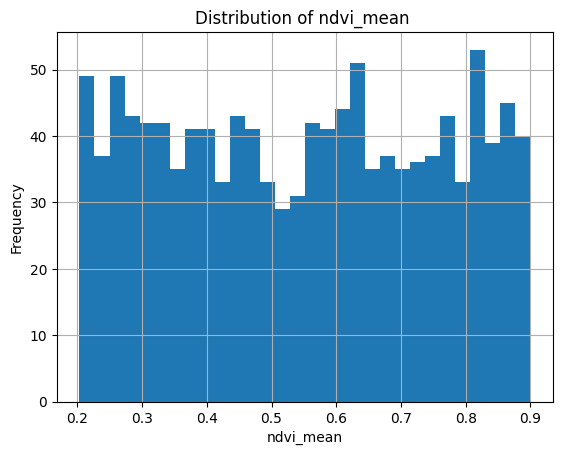

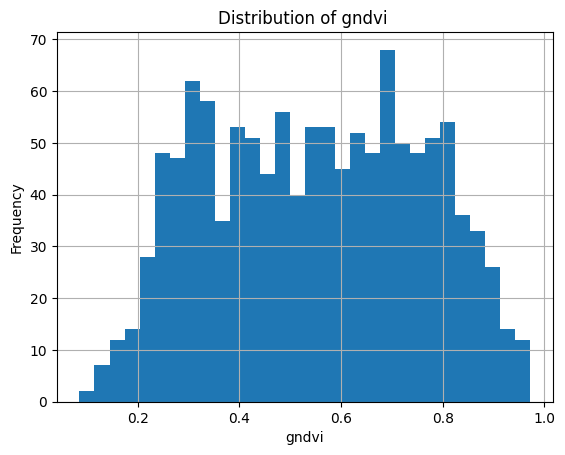

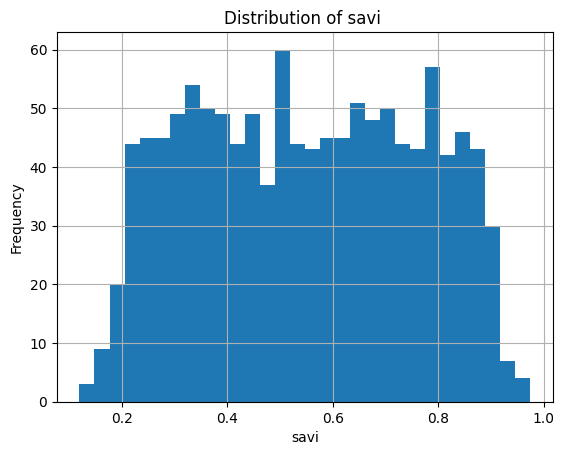

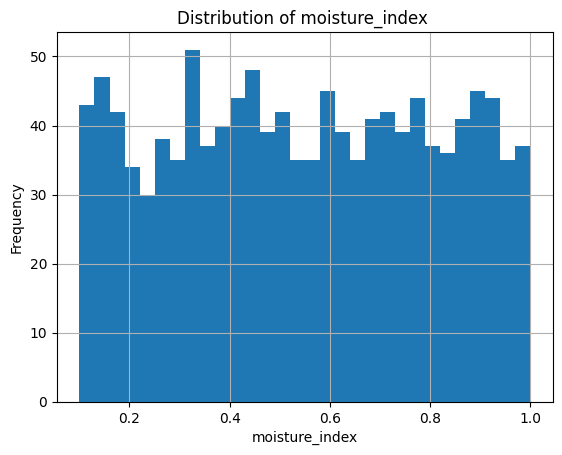

In [ ]:
##Feature Distribution visualizing
features_to_plot =[
    "ndvi_mean",
    "gndvi",
    "savi",
    "moisture_index"
]
for feature in features_to_plot:
  plt.figure()
  df[feature].hist(bins=30)
  plt.title(f"Distribution of {feature} ")
  plt.xlabel(feature)
  plt.ylabel("Frequency")
  plt.show()


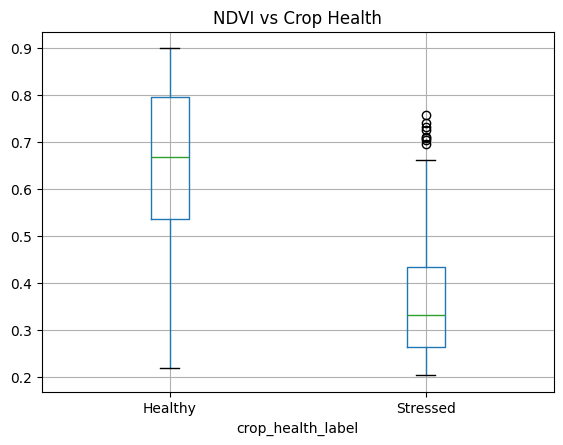

In [ ]:
## Feature vs Label relation

df.boxplot(column="ndvi_mean",by="crop_health_label")
plt.title("NDVI vs Crop Health")
plt.suptitle("")
plt.show()

#3. Exploratory Data Analysis (EDA)

Exploratory data analysis was performed to understand feature distributions and variability. Histograms revealed meaningful differences between healthy and stressed crops, particularly for vegetation indices such as NDVI and GNDVI. Box plots further highlighted that stressed crops generally exhibit lower vegetation index values.

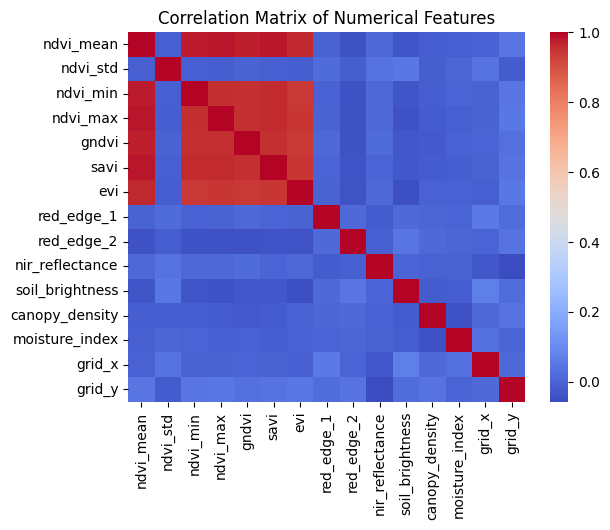

In [ ]:
## Correlation Checking for Feature redundancy
# Exclude non-numeric columns before calculating correlation
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, cmap="coolwarm")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#4. Feature Engineering

A correlation heatmap was used to identify highly correlated features. To reduce multicollinearity and improve model interpretability, a subset of relevant features was selected for Logistic Regression. Tree-based models were later trained using a broader feature set, as they are less sensitive to feature correlation.

Classifying the crop is healthy or stressed Logistic Regression was used as a baseline model to establish a reference performance before applying more complex models.

#5. Model Development

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

## Feature Selection
selected_log_features=[
    "ndvi_mean",
    "gndvi",
    "savi",
    "evi",
    "moisture_index",
    "canopy_density",
    "soil_brightness",
    "red_edge_1"
  ] # grid_X and grid_y no relation which is actually used for mapping not to describe crop is healthy or not
    # red_edge_1 and red_edge_2 both indices originate from the same spectral region and convey similar information so for model stability and interpretability only one is retained
X_log =df[selected_log_features]
y =df["crop_health_label"]

In [ ]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(
    X_log,
    y,
    test_size = 0.2, random_state=42)

In [ ]:
from sklearn import pipeline
#Logistic Regression Pipeline(with scaling)

pipeline_log=Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000,
                                  multi_class="auto",
                                  solver="lbfgs"
                                  ))
])
pipeline_log.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(max_iter=1000, multi_class='auto'))])

Logistic Regression Accuracy : 0.975

 Classification Report:

              precision    recall  f1-score   support

     Healthy       0.98      0.98      0.98       156
    Stressed       0.96      0.96      0.96        84

    accuracy                           0.97       240
   macro avg       0.97      0.97      0.97       240
weighted avg       0.97      0.97      0.97       240


Confusion Matrix:

[[153   3]
 [  3  81]]


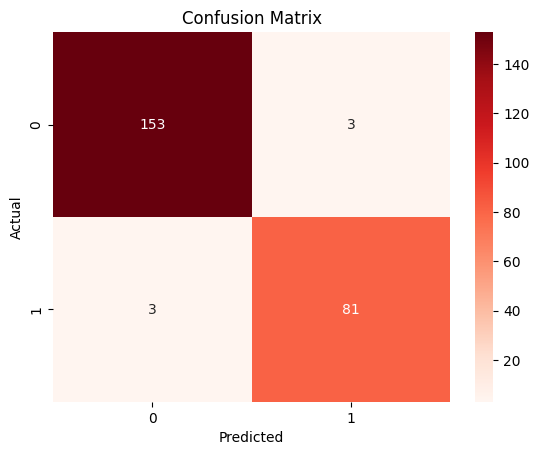

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Prdiction & Evaluation
y_pred_log = pipeline_log.predict(X_test)
print("Logistic Regression Accuracy :",accuracy_score(y_test,y_pred_log))

print("\n Classification Report:\n")
print(classification_report(y_test,y_pred_log))
print("\nConfusion Matrix:\n")
cm = confusion_matrix(y_test,y_pred_log)
print(cm)

# plotting the confusion matrix
sns.heatmap(cm, annot = True, fmt ='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Although Logistic Regression  performs very well & more Complex model Like  Random Forest are evaluted  to ensure  robustness and avoid overfitting.

In [ ]:
train_score_log = pipeline_log.score(X_train,y_train)
test_score_log = pipeline_log.score(X_test,y_test)

print(f"Training Score of Logistic Regression : {train_score_log}")
print(f"Testing Score of Logistic Regression : {test_score_log}")

Training Score of Logistic Regression : 0.984375
Testing Score of Logistic Regression : 0.975


In [ ]:
y_train_pred_log = pipeline_log.predict(X_train)
print("Training Report:\n", classification_report(y_train,y_train_pred_log))
print("Testing Report:\n", classification_report(y_test,y_pred_log))

Training Report:
               precision    recall  f1-score   support

     Healthy       0.99      0.99      0.99       624
    Stressed       0.98      0.98      0.98       336

    accuracy                           0.98       960
   macro avg       0.98      0.98      0.98       960
weighted avg       0.98      0.98      0.98       960

Testing Report:
               precision    recall  f1-score   support

     Healthy       0.98      0.98      0.98       156
    Stressed       0.96      0.96      0.96        84

    accuracy                           0.97       240
   macro avg       0.97      0.97      0.97       240
weighted avg       0.97      0.97      0.97       240



By comparing tarining and testing scores, we can detect overfitting and evaluate how well the model generalizes to unseen data and also while checking classification report get good results model does not memorize the result which means model learn the pattern very good.

In [ ]:
print(pipeline_log.classes_)

['Healthy' 'Stressed']


Logistic Regression ROC-AUC : 0.9989316239316239


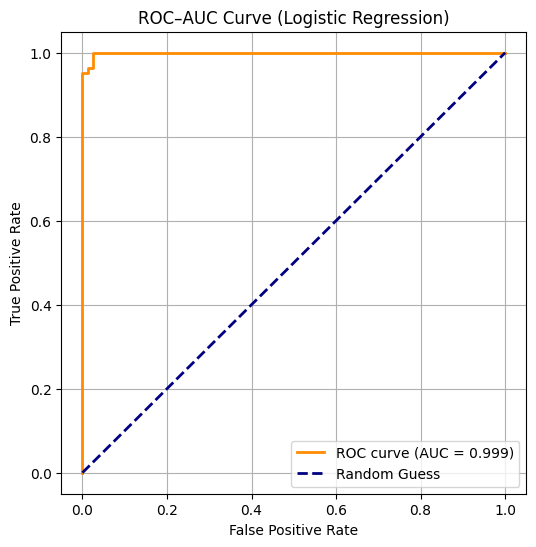

In [ ]:
## ROC - AUC

from sklearn.metrics import roc_curve, auc, roc_auc_score

y_prob_log = pipeline_log.predict_proba(X_test)[:,1] # probablity of positive class(Stressed)

# ROC-AUC curve points
fpr_log, tpr_log, thresholds = roc_curve(y_test,y_prob_log, pos_label="Stressed")
roc_auc_log = auc(fpr_log,tpr_log)
print(f"Logistic Regression ROC-AUC : {roc_auc_log}")

# Plotting of ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr_log, tpr_log, color="darkorange", lw=2,
         label=f"ROC curve (AUC = {roc_auc_log:.3f})")

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--",
         label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curve (Logistic Regression)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## **5.1 Logistic Regression (Baseline)**

Logistic Regression was used as a baseline model due to its simplicity and interpretability. Feature scaling was applied using a standardization pipeline. The model achieved high accuracy and ROC–AUC, indicating strong linear separability between healthy and stressed crops

A preprocessing pipeline was used for Logistic Regression to ensure proper feature scaling, whereas tree-based model were trained directly since they are invariant to feature scalling

In [ ]:
# now trying with decision tree to check linear relationship
from sklearn.tree import DecisionTreeClassifier

tree_features=[
    "ndvi_mean",
    "ndvi_min",
    "ndvi_std",
    "gndvi",
    "savi",
    "evi",
    "red_edge_1",
    "red_edge_2",
    "nir_reflectance",
    "soil_brightness",
    "canopy_density",
    "moisture_index",
    "grid_x",
    "grid_y"
  ]
X_tree =df[tree_features]
y =df["crop_health_label"]

#Tain-Test-Split
X_train, X_test, y_train, y_test = train_test_split(
    X_tree,
    y,
    test_size = 0.2, random_state=42, stratify = y)

model_dt= DecisionTreeClassifier(
        max_depth =5,
        random_state= 42,
        min_samples_leaf=10,
        class_weight='balanced'
    )
model_dt.fit(X_train,y_train)

y_pred_dt =model_dt.predict(X_test)
y_prob_dt = model_dt.predict_proba(X_test)[:,1]

print("Decision Tree")
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))
ROC_AUC_dt = roc_auc_score(y_test,y_prob_dt)
print("ROC-AUC :",ROC_AUC_dt )


Decision Tree
[[141  15]
 [ 14  70]]
              precision    recall  f1-score   support

     Healthy       0.91      0.90      0.91       156
    Stressed       0.82      0.83      0.83        84

    accuracy                           0.88       240
   macro avg       0.87      0.87      0.87       240
weighted avg       0.88      0.88      0.88       240

ROC-AUC : 0.938949938949939


## **5.2 Decision Tree**

A Decision Tree classifier was trained to capture non-linear relationships within the data. While the model performed reasonably well, it showed slightly lower generalization performance compared to Logistic Regression.

In [ ]:

# With Random Forest
from sklearn.ensemble import RandomForestClassifier


model_rf = RandomForestClassifier(
        n_estimators = 200,
        random_state= 42,
        class_weight= 'balanced',
        n_jobs = -1
    )

model_rf.fit(X_train,y_train)

y_pred_rf = model_rf.predict(X_test)
y_prob_rf = model_rf.predict_proba(X_test)[:,1]

print("Random Forest")
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
ROC_AUC_RF = roc_auc_score(y_test,y_prob_rf)
print("ROC-AUC",ROC_AUC_RF)

Random Forest
[[150   6]
 [ 10  74]]
              precision    recall  f1-score   support

     Healthy       0.94      0.96      0.95       156
    Stressed       0.93      0.88      0.90        84

    accuracy                           0.93       240
   macro avg       0.93      0.92      0.93       240
weighted avg       0.93      0.93      0.93       240

ROC-AUC 0.9827533577533578


## **5.3 Random Forest**

Random Forest was used to improve robustness by aggregating multiple decision trees. This model achieved high accuracy and ROC–AUC, demonstrating strong performance in capturing complex feature interactions

In [ ]:
# ROC curve points for decision tree and Random Forest
# Note already plotted for Logistic Regression we are using same
# for Decision Tree
fpr_dt, tpr_dt, thresholds = roc_curve(y_test,y_prob_dt, pos_label="Stressed")
roc_auc_dt = auc(fpr_dt,tpr_dt)
print(f"Decision Tree ROC-AUC : {roc_auc_dt}")

# for Random Forest
fpr_rf, tpr_rf, thresholds = roc_curve(y_test,y_prob_rf, pos_label="Stressed")
roc_auc_rf = auc(fpr_rf,tpr_rf)
print(f"Random Forest ROC-AUC : {roc_auc_rf}")


Decision Tree ROC-AUC : 0.938949938949939
Random Forest ROC-AUC : 0.9827533577533578


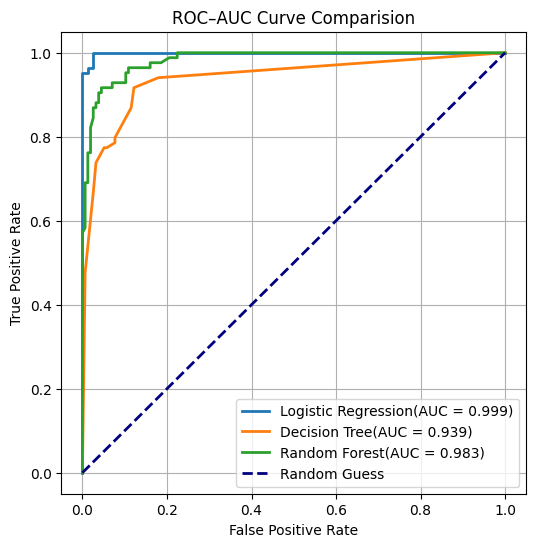

In [ ]:
# ROC curve comparision all model
plt.figure(figsize=(6,6))
plt.plot(fpr_log, tpr_log, lw=2,
         label=f"Logistic Regression(AUC = {roc_auc_log:.3f})")
plt.plot(fpr_dt, tpr_dt, lw=2,
         label=f"Decision Tree(AUC = {roc_auc_dt:.3f})")
plt.plot(fpr_rf, tpr_rf, lw=2,
         label=f"Random Forest(AUC = {roc_auc_rf:.3f})")

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--",
         label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curve Comparision")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#6. Model Evaluation and Comparison

Models were evaluated using accuracy, precision, recall, F1-score, confusion matrix, and ROC–AUC curves. Logistic Regression achieved the highest ROC–AUC, followed closely by Random Forest. Decision Tree showed comparatively lower performance, likely due to overfitting tendencies.

In [ ]:
# test of Logistic regression model on synthetic data

#Synthetic Features
X_syn_log = X_log.sample(
    n =1000,
    replace = True,
    random_state=42
).copy()
#With Noise
X_syn_log = X_syn_log + np.random.randn(*X_syn_log.shape)*X_log.std().values*0.05

#Synthetic Labels
y_syn_log =y.sample(n=1000,replace=True,random_state=42).values

# Create synthetic dataframe
df_syn_log = X_syn_log.copy()
df_syn_log['crop_health_label'] = y_syn_log
# Predict using trained pipeline on logistic model

y_syn_pred_log = pipeline_log.predict(df_syn_log[selected_log_features])

print("Classification Report of (Synthetic Data - Logistic Regression)")
print(classification_report(y_syn_log,y_syn_pred_log))
print("Confusion Matrix")
print(confusion_matrix(y_syn_log,y_syn_pred_log))


Classification Report of (Synthetic Data - Logistic Regression)
              precision    recall  f1-score   support

     Healthy       0.99      0.99      0.99       653
    Stressed       0.98      0.98      0.98       347

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.99      0.98      0.99      1000

Confusion Matrix
[[645   8]
 [  7 340]]


To assess model robustness, synthetic data was generated by resampling the original feature set and introducing controlled Gaussian noise proportional to each feature’s variability. Evaluation on this synthetic dataset yielded an overall accuracy of 98%, with balanced precision and recall across both classes. The confusion matrix shows minimal false positives and false negatives, particularly for the stressed crop class, which is critical for agricultural decision-making. These results indicate that the logistic regression model generalizes well and is not overfitted to the original training data

In [ ]:
# test of Decision tree and Random Forest model on synthetic data
#Synthetic Features
X_syn_tree = X_tree.sample(
    n =1000,
    replace = True,
    random_state=42
).copy()
#With Noise
X_syn_tree = X_syn_tree + np.random.randn(*X_syn_tree.shape)*X_tree.std().values*0.05

#Synthetic Labels
y_syn_tree =y.sample(n=1000,replace=True,random_state=42).values

# Create synthetic dataframe
df_syn_tree = X_syn_tree.copy()
df_syn_tree['crop_health_label'] = y_syn_tree
# Predict using trained pipeline on Decision tree model

y_syn_pred_dt = model_dt.predict(df_syn_tree[tree_features])

print("Classification Report of (Synthetic Data - Decision Tree)")
print(classification_report(y_syn_tree,y_syn_pred_dt))
print("Confusion Matrix")
print(confusion_matrix(y_syn_tree,y_syn_pred_dt))

# Predict using trained pipeline on Random Forest model

y_syn_pred_rf = model_rf.predict(df_syn_tree[tree_features])

print("\nClassification Report of (Synthetic Data - Random forest)")
print(classification_report(y_syn_tree,y_syn_pred_rf))
print("Confusion Matrix")
print(confusion_matrix(y_syn_tree,y_syn_pred_rf))

Classification Report of (Synthetic Data - Decision Tree)
              precision    recall  f1-score   support

     Healthy       0.96      0.93      0.94       653
    Stressed       0.87      0.93      0.90       347

    accuracy                           0.93      1000
   macro avg       0.92      0.93      0.92      1000
weighted avg       0.93      0.93      0.93      1000

Confusion Matrix
[[607  46]
 [ 26 321]]

Classification Report of (Synthetic Data - Random forest)
              precision    recall  f1-score   support

     Healthy       0.98      0.99      0.99       653
    Stressed       0.98      0.97      0.98       347

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

Confusion Matrix
[[647   6]
 [ 10 337]]


The robustness of models was tested using synthetic data, which mimicked real-world variability. The Logistic Regression model continued to be a strong baseline model, while the Decision Tree model was more sensitive to variability, and the random forest model performed well and reliably. The results suggest that the models, especially the **Random Forest** model, generalize well and can be used for effective crop stress detection.

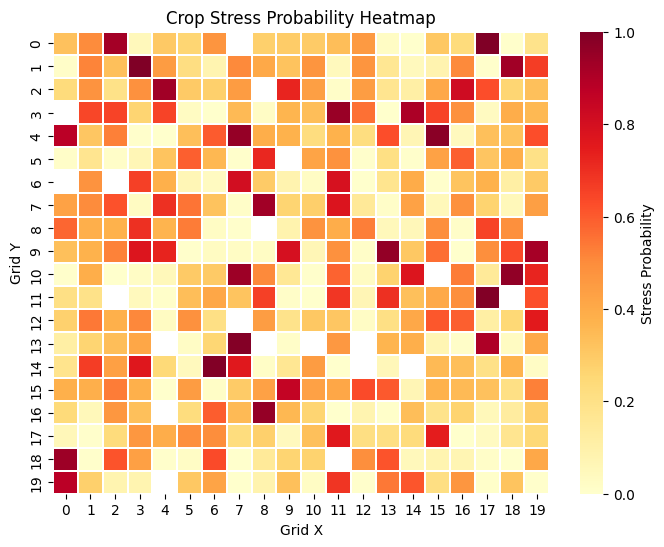

In [ ]:
df["stress_prob"] = model_rf.predict_proba(X_tree)[:,1]

pivot_prob = df.pivot_table(
    index="grid_y",
    columns="grid_x",
    values="stress_prob"
)

plt.figure(figsize=(8,6))
sns.heatmap(
    pivot_prob,
    cmap="YlOrRd",
    cbar_kws={"label": "Stress Probability"},
    linewidths=0.2
)
plt.title("Crop Stress Probability Heatmap")
plt.xlabel("Grid X")
plt.ylabel("Grid Y")
plt.show()


This heatmap represents the spatial distribution of predicted crop stress probabilities across the field. Higher probability regions indicate areas more likely to be stressed, while lower values correspond to healthier zones. The visualization highlights that crop stress is spatially localized rather than uniformly distributed.

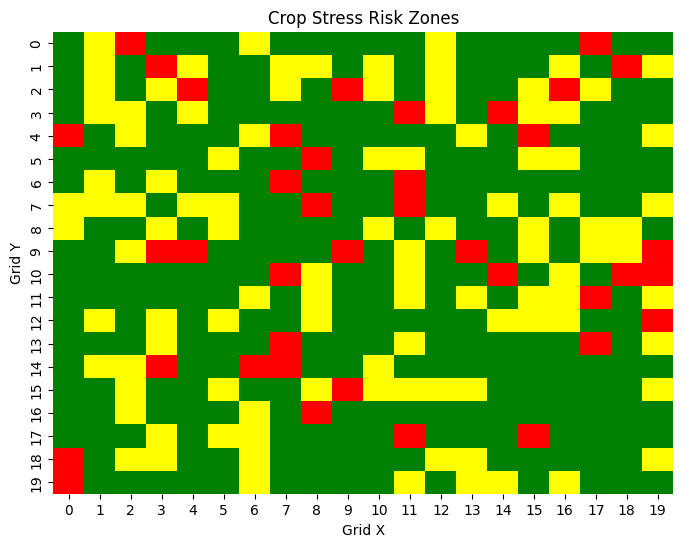

In [ ]:

zones = np.where(
    pivot_prob > 0.7, 2,
    np.where(pivot_prob > 0.4, 1, 0)
)

plt.figure(figsize=(8,6))
sns.heatmap(
    zones,
    cmap=["green", "yellow", "red"],
    cbar=False
)
plt.title("Crop Stress Risk Zones")
plt.xlabel("Grid X")
plt.ylabel("Grid Y")
plt.show()


To convert probabilities into actionable insights, threshold-based zoning was applied. Areas with low probability represent healthy regions, medium values indicate early stress signs, and high values highlight critical zones requiring immediate attention. This approach supports precision agriculture by enabling targeted intervention instead of whole-field treatment.

#7. Spatial Stress Mapping and Thresholding

Predicted stress probabilities were spatially visualized using grid-based heatmaps. To convert probabilities into actionable insights, threshold-based zoning was applied. Areas with probability below 0.4 were labeled as low-risk, values between 0.4 and 0.7 as moderate-risk, and values above 0.7 as high-risk stress zones.

This approach transforms model outputs into farmer-friendly decision maps, enabling targeted intervention rather than uniform field treatment.

#8. Challenges and Limitations

One challenge encountered was feature correlation, which required careful feature selection for linear models. Additionally, threshold selection for stress zoning involved balancing early detection with false alarms. Synthetic data experiments were also conducted to test model robustness, though real-world variability may differ.

#9. Conclusion

In this research, several machine learning models were assessed for the task of crop stress detection using multispectral vegetation indices from drone data. Logistic Regression was used as a baseline model because of its simplicity and interpretability. Despite its linear nature, it performed well, with a high ROC-AUC score, showing that there is a strong separation between healthy and stressed crops.

Further analysis of the Decision Tree and Random Forest models was conducted to better understand non-linear relationships in the data. The Decision Tree showed moderate performance but was more prone to overfitting. The Random Forest model produced stable and accurate results by combining the predictions of multiple trees, handling interactions and noise in the features effectively.

After a thorough analysis of the results, with a focus on ROC-AUC scores and robustness to thresholds, the Random Forest model was chosen as the final model for practical implementation, while the Logistic Regression model remains a strong baseline model because of its interpretability.

In addition to its accuracy, the addition of spatial coordinates (grid_x, grid_y) enabled the creation of spatial probability heat maps from predictions. Threshold-based zoning allowed for the direct implementation of results, dividing areas into low, medium, and high stress zones.

The proposed method contributes to the field of precision agriculture by allowing for targeted actions in the field, preventing unnecessary resource allocation, and improving crop management efficiency. This research shows how the combination of multispectral data from drones and machine learning can provide valuable and actionable insights for modern agriculture.


# Task 5: Reflection & Future Scope

### 1. Project Limitations

While the Random Forest model successfully classified crop stress with high accuracy, there are several limitations to this study that must be acknowledged for real-world deployment:

* **Static vs. Temporal Data:** This project analyzed a single snapshot of data. In reality, crop health changes daily. A model based on one point in time might misinterpret temporary stress (like wilting on a hot afternoon) as permanent disease.
* **Dependency on Lighting Conditions:** Although we used ratios like NDVI to mitigate lighting issues, extreme cloud cover or shadows during drone flight can still introduce noise into the spectral data, potentially leading to false positives in stress detection.
* **Ground Truth Reliability:** The accuracy of our model is entirely dependent on the quality of the "Stress Labels" in the training data. If the manual inspection used to label this dataset had errors, the model has learned those errors.

### 2. Proposed Improvements

To transition this project from a prototype to a commercial agricultural tool, I propose the following improvements:

* **Integration of Thermal Imagery:** Currently, we rely on reflected light (multispectral). Adding a thermal camera would allow us to detect "water stress" days before it is visible in NDVI, as stressed plants tend to be physically hotter than healthy transpiring plants.
* **Time-Series Analysis:** Instead of a simple classifier, a Long Short-Term Memory (LSTM) network could be trained on data collected over several weeks. This would allow the AI to track the *rate* of decline, distinguishing between rapid disease outbreak and slow nutrient deficiency.
* **Edge Computing on Drones:** Currently, data is processed after the flight. Deploying a lightweight version of this model (e.g., using TensorFlow Lite) directly on the drone would allow for real-time "spray on demand," where the drone applies treatment immediately upon detecting stress.

### 3. Conclusion

This capstone successfully demonstrated that machine learning, specifically the Random Forest algorithm, can effectively interpret multispectral drone data to identify crop stress. By analyzing vegetation indices like NDVI and GNDVI, we created a scalable method for monitoring field health. The generated stress heatmaps provide actionable insights, proving that AI can significantly reduce the manual labor required in precision agriculture.

